In [1]:
from qtconsole.mainwindow import background
!pip install dataframe_image

ModuleNotFoundError: No module named 'PyQt5'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi

import seaborn as sns
import medialpy
#sample data load
# df = pd.read_csv('./data/sample_data_100.csv', dtype=str)

df = pd.read_csv('./data/my_data/attribute+test.csv', dtype=str)

In [2]:
df

,Unnamed: 0,test_id,attr_id,attr_name,result,test_group_name,test_name,data_type
0,42593,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
1,43358,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
2,73103,101497,100157.0,M.P.V,---,NaN,CBC,Categorical
3,83948,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
4,84488,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
...,...,...,...,...,...,...,...,...
92029,3528238,101455,3002939.0,Sugar,Nil,CHEMICAL EXAMINATION,Urine Phase contrast microscopy,Categorical
92030,3529324,207199,3002848.0,Blood Group :,"""AB""",NaN,Autologus,Categorical
92031,3529325,207199,3002849.0,Rh Type :,Negative,NaN,Autologus,Categorical
92032,3529330,207199,3002854.0,Blood Group :,"""AB""",NaN,Autologus,Categorical


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df

,test_id,attr_id,attr_name,result,test_group_name,test_name,data_type
0,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
1,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
2,101497,100157.0,M.P.V,---,NaN,CBC,Categorical
3,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
4,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
...,...,...,...,...,...,...,...
92029,101455,3002939.0,Sugar,Nil,CHEMICAL EXAMINATION,Urine Phase contrast microscopy,Categorical
92030,207199,3002848.0,Blood Group :,"""AB""",NaN,Autologus,Categorical
92031,207199,3002849.0,Rh Type :,Negative,NaN,Autologus,Categorical
92032,207199,3002854.0,Blood Group :,"""AB""",NaN,Autologus,Categorical


In [5]:
df['test_name'].unique()

array(['CBC', 'Urine R/M/E', 'HBs Ag', 'Anti-HCV', 'VDRL',
       'Blood Grouping and Rh Factor',
       'Grouping + Cross Matching + Screening', 'Urine for C/S', 'HBsAg',
       'Dengue Antibody IgG', 'Dengue Ag NS1 (ICT)', 'Stool R/E',
       'Anti-HBc Total', 'HVS for C/S', 'Malaria Ag (ICT)', 'Anti-HBe',
       'PLC/Unit', 'Toxoplasma IgM', 'HBs Ag (ICT)', 'Anti-HAV IgM',
       'Albumin (Urine)', 'Cell Count (Cytology)', 'FFP/Unit',
       'Chikungunya Antibody IgM ICT',
       'Complete Urine Analysis (Urine R/E)',
       'Grouping+ICT+Cross Matching + Screening', 'RCC/Unit', 'Stock FFP',
       'Stock W/B, PBRC', 'Platelet Apheresis',
       'PRP/Unit (more than 10ml)',
       'Fresh W/B, PBRC (Same Donor within 5 Days without Grouping Cross Matching & Screening)',
       'WRCC/Unit', 'W.B/Unit', 'Urine Phase contrast microscopy',
       'Autologus'], dtype=object)

In [7]:
term = medialpy.find("HBs Ag (ICT)")
print(term.meaning)

AttributeError: 'NoneType' object has no attribute 'meaning'

In [8]:
import numpy as np

df['attr_id'] = df['attr_id'].astype(float)

In [9]:
df_catagorical_count = df.groupby(['test_name']).size().reset_index(name='counts').sort_values(['counts'], ascending=[False])
df_catagorical_count['ratio'] = df_catagorical_count ['counts'].apply(lambda x: (x/df.shape[0])*100.00)
df_catagorical_count

,test_name,counts,ratio
10,Complete Urine Analysis (Urine R/E),36322,39.465850
15,Grouping + Cross Matching + Screening,17462,18.973423
6,Blood Grouping and Rh Factor,9322,10.128865
28,Stool R/E,6630,7.203859
17,HBs Ag,3965,4.308190
11,Dengue Ag NS1 (ICT),3577,3.886607
4,Anti-HCV,3157,3.430254
31,Urine R/M/E,2588,2.812004
26,Stock FFP,2338,2.540366
33,VDRL,2138,2.323055


In [7]:
df_catagorical_count = df.groupby(['test_id','test_name','attr_name']).size().reset_index(name='counts').sort_values(['counts'], ascending=[False])
df_catagorical_count['ratio'] = df_catagorical_count ['counts'].apply(lambda x: (x/df.shape[0])*100.00)
df_catagorical_count

,test_id,test_name,attr_name,counts,ratio
65,5003345,Complete Urine Analysis (Urine R/E),Appearance,12108,13.156008
66,5003345,Complete Urine Analysis (Urine R/E),Colour,12107,13.154921
67,5003345,Complete Urine Analysis (Urine R/E),Sugar,12107,13.154921
28,100824,Grouping + Cross Matching + Screening,Blood Group :,8732,9.487798
29,100824,Grouping + Cross Matching + Screening,Rh Type :,8730,9.485625
...,...,...,...,...,...
34,101006,HVS for C/S,Amikacin,1,0.001087
36,101006,HVS for C/S,Ceftriaxone,1,0.001087
37,101006,HVS for C/S,Ciprofloxacin,1,0.001087
38,101006,HVS for C/S,Gentamicin,1,0.001087


In [10]:
df_catagorical_count = df.groupby(['test_name','attr_id','attr_name']).size().reset_index(name='counts').sort_values(['counts'], ascending=[False])
df_catagorical_count['ratio'] = df_catagorical_count ['counts'].apply(lambda x: (x/df.shape[0])*100.00)
df_catagorical_count

,test_name,attr_id,attr_name,counts,ratio
14,Complete Urine Analysis (Urine R/E),3000017.0,Appearance,12108,13.156008
16,Complete Urine Analysis (Urine R/E),3000037.0,Sugar,12107,13.154921
15,Complete Urine Analysis (Urine R/E),3000020.0,Colour,12107,13.154921
9,Blood Grouping and Rh Factor,100441.0,Blood Group: ABO,4661,5.064433
10,Blood Grouping and Rh Factor,100442.0,Rh (D),4661,5.064433
...,...,...,...,...,...
41,HVS for C/S,101810.0,Amoxyclave,1,0.001087
42,HVS for C/S,101812.0,Amikacin,1,0.001087
43,HVS for C/S,3000087.0,Tigecycline,1,0.001087
44,HVS for C/S,3000224.0,Tobramycin,1,0.001087


In [8]:
df_catagorical_count.to_csv("./usagi_loinc_new.csv")

In [11]:
df_catagorical_count = df.groupby(['test_id','test_name']).size().reset_index(name='counts').sort_values(['counts'], ascending=[False])
df_catagorical_count['ratio'] = df_catagorical_count ['counts'].apply(lambda x: (x/df.shape[0])*100.00)
df_catagorical_count

,test_id,test_name,counts,ratio
33,5003345,Complete Urine Analysis (Urine R/E),36322,39.465850
15,100824,Grouping + Cross Matching + Screening,17462,18.973423
1,100213,Blood Grouping and Rh Factor,9322,10.128865
10,100631,Stool R/E,6630,7.203859
23,101339,HBs Ag,3965,4.308190
7,100433,Dengue Ag NS1 (ICT),3577,3.886607
4,100388,Anti-HCV,3157,3.430254
9,100630,Urine R/M/E,2588,2.812004
16,100901,Stock FFP,2338,2.540366
22,101338,VDRL,2138,2.323055


In [12]:

df_catagorical_count.to_csv("./usagi_loinc.csv")

In [13]:
import math


def distribution(string_lab_name, df):
    df = df.loc[df['test_name'].isin([string_lab_name])]
    value_c = pd.DataFrame(df['result'].value_counts())

    sum = 0
    for  x in value_c.result:
        sum += x

    percent = []

    for x  in value_c.result:
        p = math.trunc((x/sum)*100)
        percent.append(p)


    perc = percent[0:10]

    print(perc)



    value_set = list(value_c.index[0:10])

    count = list(value_c.result[0:10])









    fig , ax = plt.subplots(figsize=(12,8))

    ax.legend([string_lab_name], loc="upper left")

    ax2 = ax.twinx()

    ax2.plot(perc)

    ax2.set_ylabel("percentage")



    barchart = sns.barplot(x = value_set , y = count, ax = ax)


    barchart.bar_label(ax.containers[0], label_type='edge', padding=10)

    fig = barchart.get_figure()

    fig.savefig("6.png")







[32, 32, 29, 1, 1, 0, 0, 0, 0, 0]


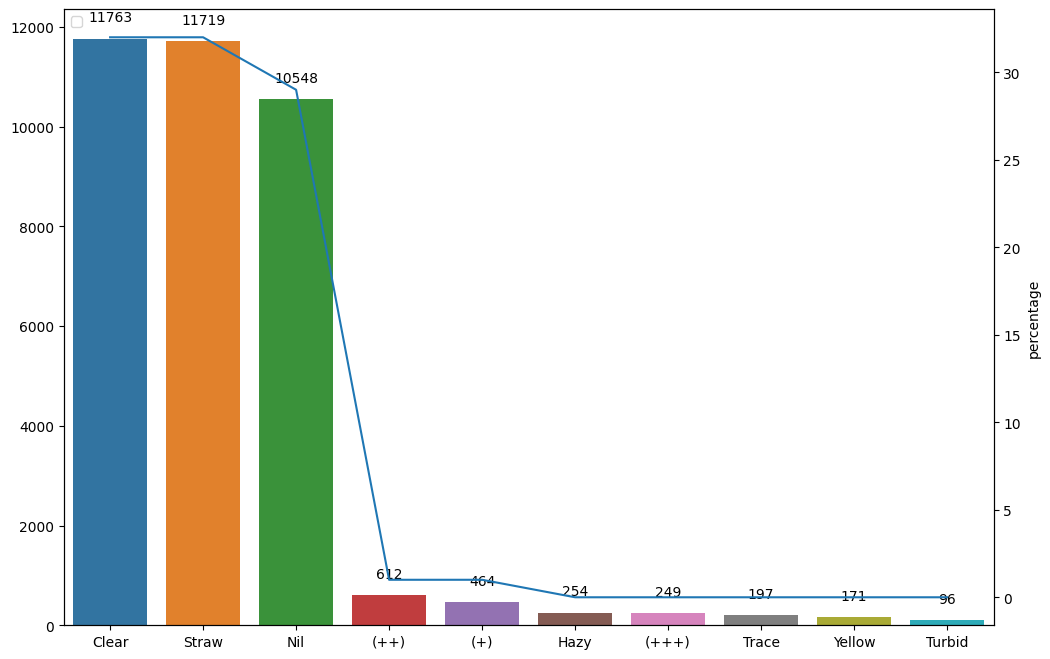

In [24]:
distribution('Complete Urine Analysis (Urine R/E)', df)

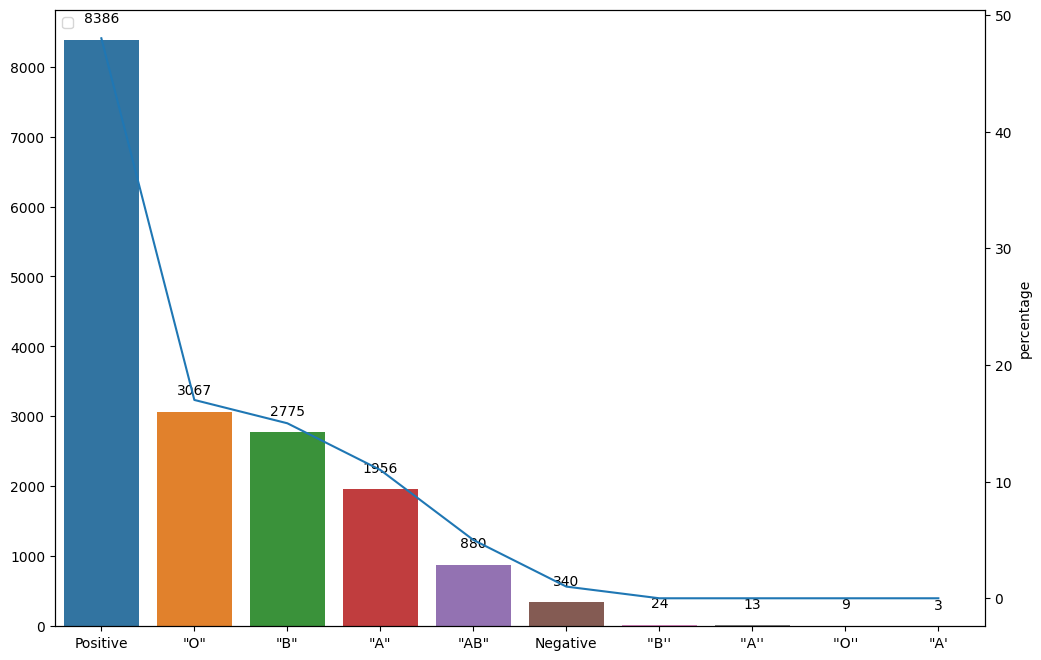

In [14]:
distribution('Grouping + Cross Matching + Screening', df)

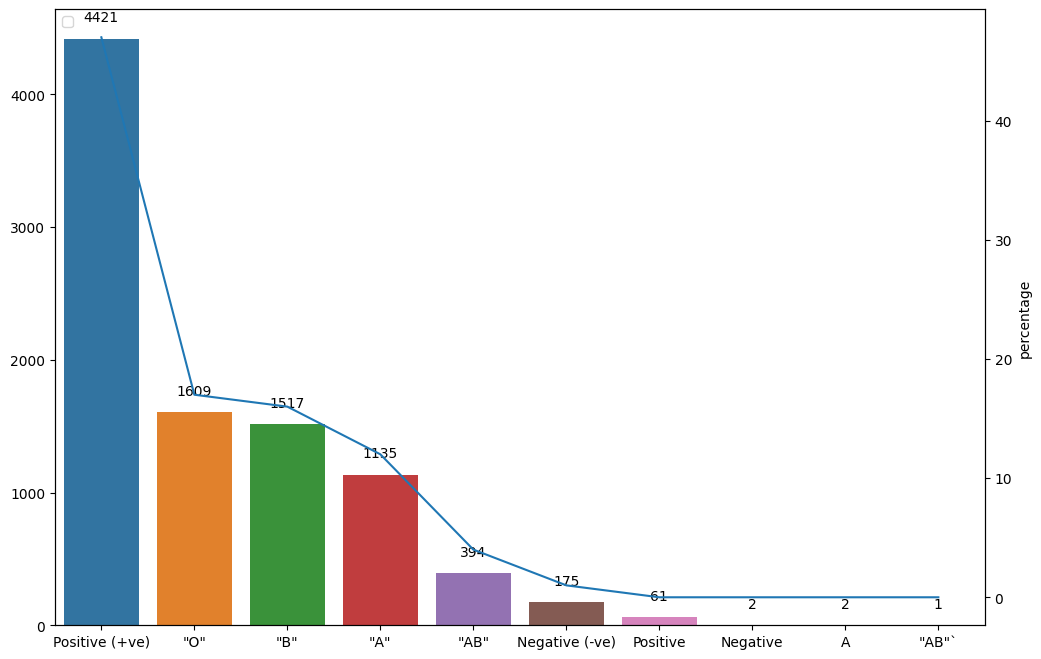

In [16]:
distribution('Blood Grouping and Rh Factor', df)

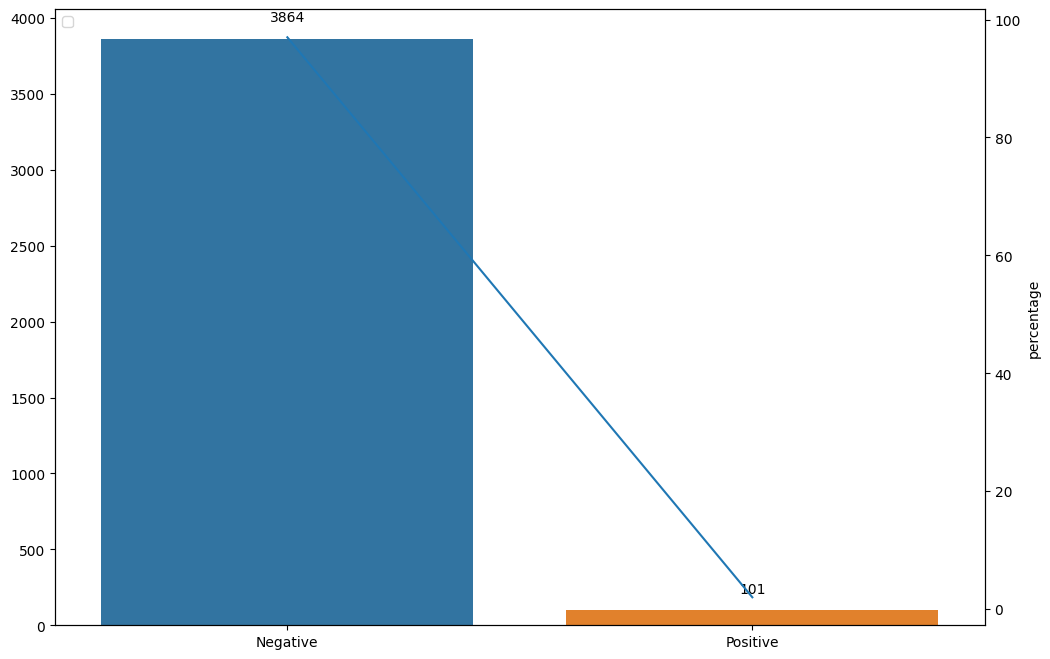

In [18]:
distribution("HBs Ag", df)

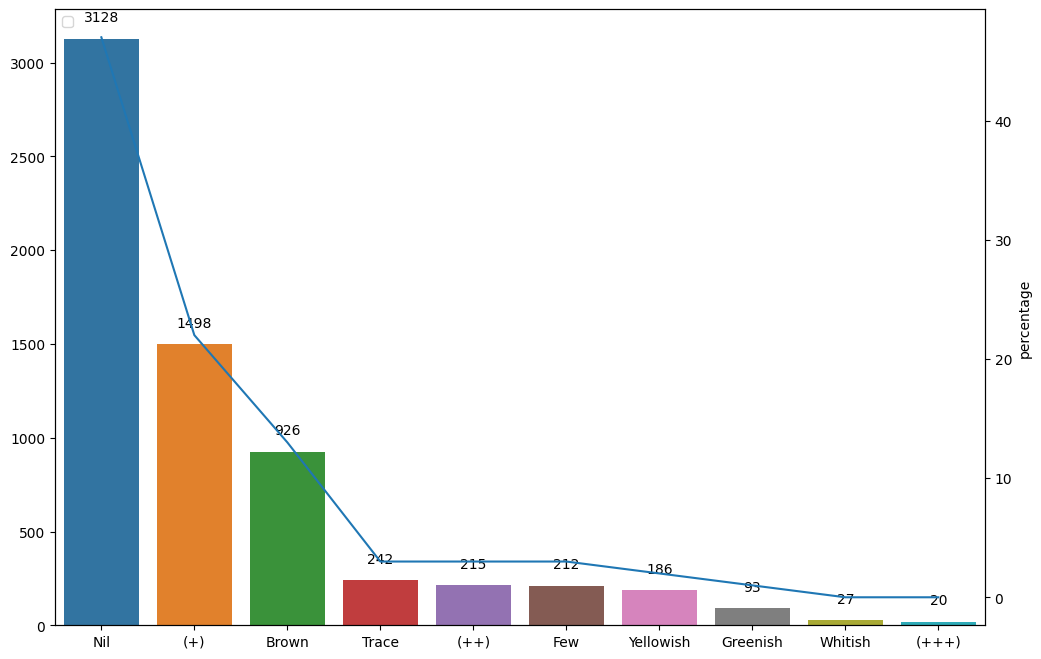

In [20]:
distribution('Stool R/E', df)

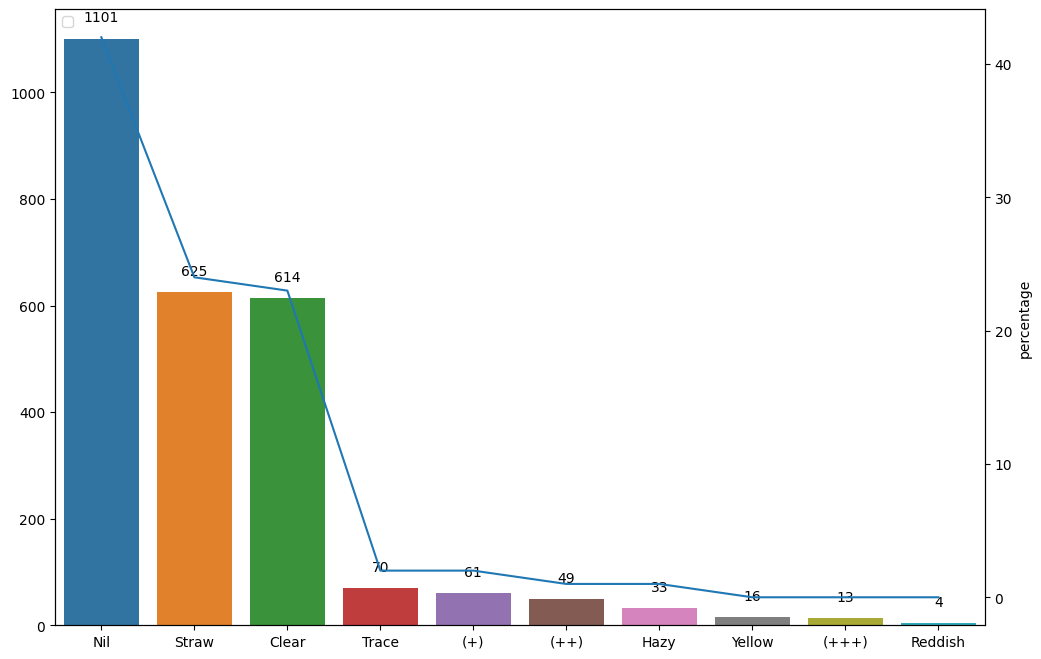

In [22]:
distribution('Urine R/M/E', df)

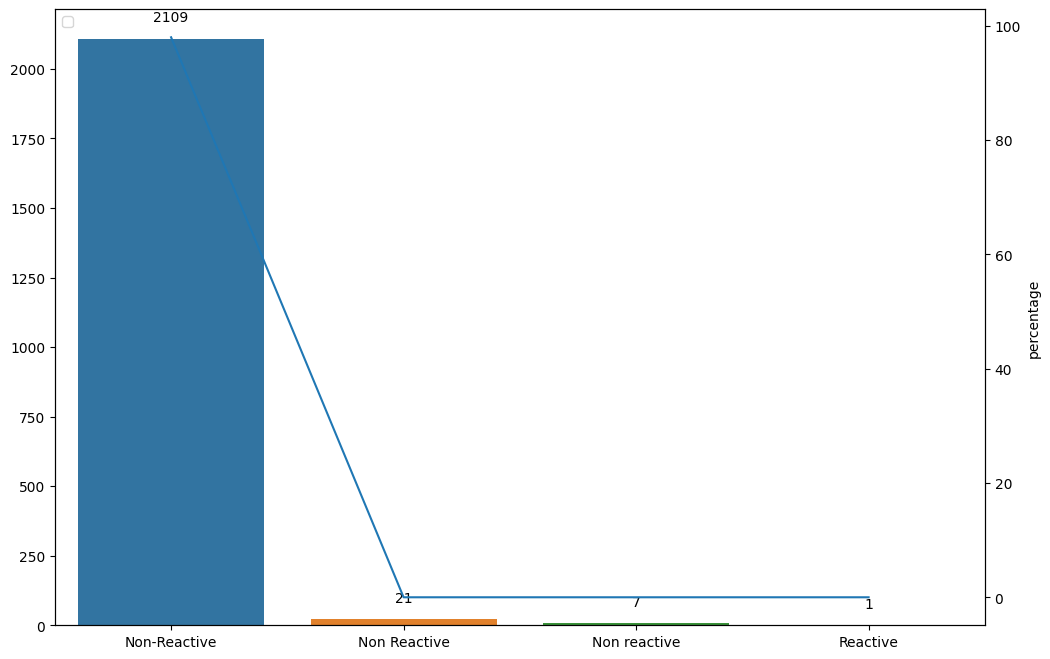

In [81]:
distribution('VDRL', df)

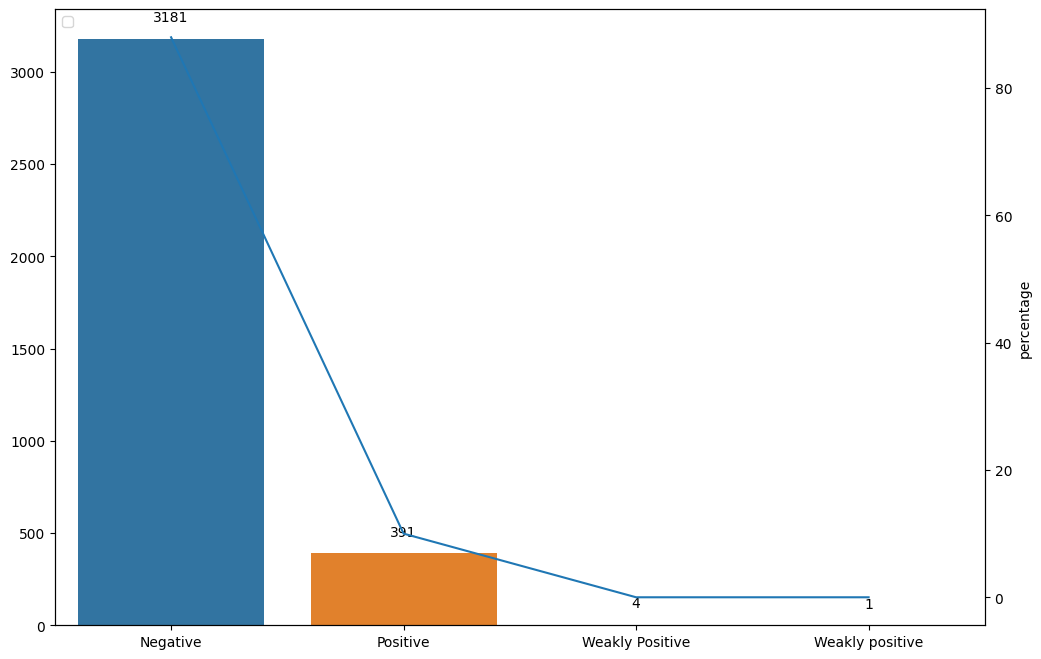

In [82]:
distribution('Dengue Ag NS1 (ICT)', df)

In [1]:
distribution('Stock FFP', df)

NameError: name 'distribution' is not defined

In [5]:
df.loc[df['result'].isin(['Present','Absent'])]

,test_id,attr_id,attr_name,result,test_group_name,test_name,data_type
18348,100630,102134.0,Ketones,Absent,ON REQUEST,Urine R/M/E,Categorical
18408,100630,102134.0,Ketones,Absent,ON REQUEST,Urine R/M/E,Categorical
18438,100630,102134.0,Ketones,Absent,ON REQUEST,Urine R/M/E,Categorical
18468,100630,102134.0,Ketones,Absent,ON REQUEST,Urine R/M/E,Categorical
18515,100630,102134.0,Ketones,Absent,ON REQUEST,Urine R/M/E,Categorical
...,...,...,...,...,...,...,...
521764,101455,3002941.0,Nitrate,Absent,CHEMICAL EXAMINATION,Urine Phase contrast microscopy,Categorical
521765,101455,3002942.0,Ketones body,Absent,CHEMICAL EXAMINATION,Urine Phase contrast microscopy,Categorical
521778,5031450,3002831.0,Urine for Myoglobin,Absent,NaN,Urine for Myoglobin,Categorical
521779,5031450,3002831.0,Urine for Myoglobin,Absent,NaN,Urine for Myoglobin,Categorical


In [14]:
s2count_df = df.groupby(['attr_name']).size().reset_index(name='counts').sort_values(['counts'], ascending=[False])

In [15]:
s2count_df

,attr_name,counts
15,Colour,12764
28,Sugar,12756
7,Appearance,12756
8,Blood Group :,11652
27,Rh Type :,11649
9,Blood Group: ABO,4661
26,Rh (D),4661
19,HBs Ag,4259
16,Dengue Ag NS1 (ICT),3577
6,Anti-HCV,3157


In [16]:
s2count_df.to_csv("attr_name.csv")

In [17]:
df.drop(df[(df['attr_name'] == 'Nil')].index, inplace=True)

In [18]:
df.describe()

,test_id,attr_id,attr_name,result,test_group_name,test_name,data_type
count,92034,91814,92034,92034,45669,92034,92034
unique,36,97,35,97,5,36,1
top,5003345,3000017.0,Colour,Nil,PHYSICAL EXAMINATION,Complete Urine Analysis (Urine R/E),Categorical
freq,36322,12108,12764,14797,25511,36322,92034


In [19]:
df

,test_id,attr_id,attr_name,result,test_group_name,test_name,data_type
0,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
1,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
2,101497,100157.0,M.P.V,---,NaN,CBC,Categorical
3,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
4,101497,100157.0,M.P.V,----,NaN,CBC,Categorical
...,...,...,...,...,...,...,...
92029,101455,3002939.0,Sugar,Nil,CHEMICAL EXAMINATION,Urine Phase contrast microscopy,Categorical
92030,207199,3002848.0,Blood Group :,"""AB""",NaN,Autologus,Categorical
92031,207199,3002849.0,Rh Type :,Negative,NaN,Autologus,Categorical
92032,207199,3002854.0,Blood Group :,"""AB""",NaN,Autologus,Categorical


In [20]:
df = df[['attr_id','result']]

In [21]:
df.columns  = ['measurement_concept_id','value_source_value']

In [22]:
df

,measurement_concept_id,value_source_value
0,100157.0,----
1,100157.0,----
2,100157.0,---
3,100157.0,----
4,100157.0,----
...,...,...
92029,3002939.0,Nil
92030,3002848.0,"""AB"""
92031,3002849.0,Negative
92032,3002854.0,"""AB"""


In [23]:
count = df.groupby(['value_source_value']).size()

In [24]:
df['value_source_value'].tolist()

['----',
 '----',
 '---',
 '----',
 '----',
 '----',
 '----',
 '----',
 '----',
 '----',
 '----',
 '----',
 '----',
 '----',
 '---',
 '----',
 '----',
 '----',
 '----',
 '---',
 '----',
 '>>>>',
 '--',
 '>>>>',
 '-',
 '>>>>',
 '>>>>',
 '--',
 '--',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '--',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '--',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '-----',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '---',
 '---',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '>>>>',
 '--',
 '----',
 '----',
 '----',
 '>>>>',
 '----',
 '-----',
 '>>>>',
 '>>>>',
 '---',
 '>>>>',
 '----',
 '>>>>',
 '--',
 '>>>>',
 '>>>>',
 '----',
 '----',
 '>>>>',
 '----',
 '>>>>',
 '----',
 '>>>>',
 '----',
 '>>>>',
 '>>>>',
 '----',
 '>>>>',
 '>>>>',
 '>>>>',
 '---',
 '----',
 '>>>>',
 '>>>>',
 '>>>>',
 '--',
 '--',
 '>>>>',
 '----',
 '--',
 '>>>>',
 '--',
 '----',
 '>>>>',
 '----',
 '>>>>',
 '>>>>',
 '---',
 '>>>>',
 '---

In [25]:
count

value_source_value
 "B"            1
 "O"            2
 Positive       1
"A              1
"A"          3682
             ... 
YELLOW         11
Yellow        206
Yellowish     190
p               1
positive        5
Length: 97, dtype: int64

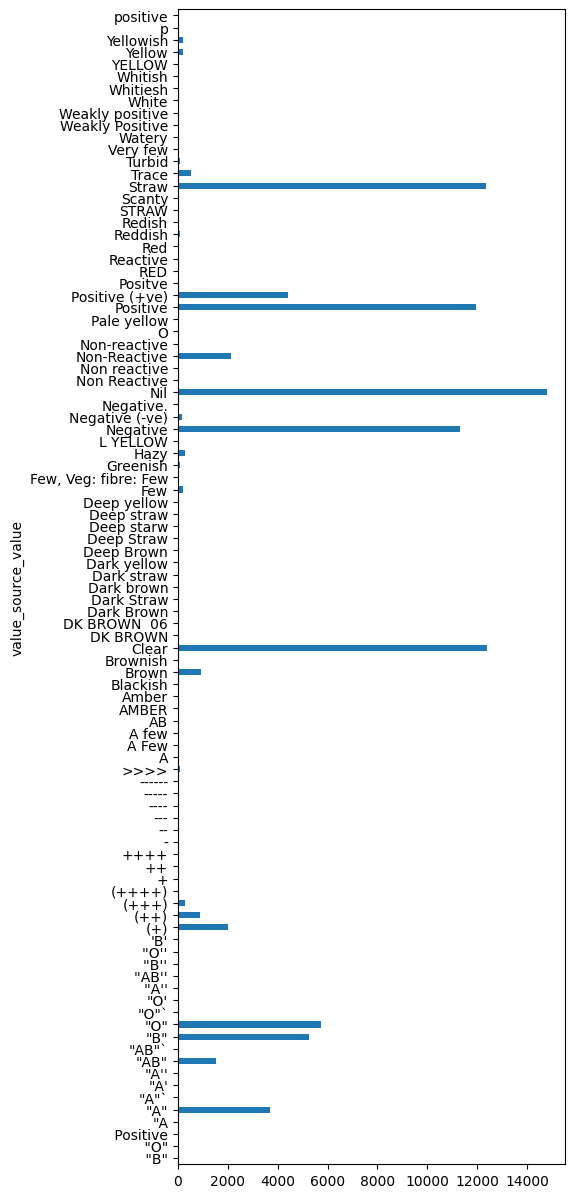

In [34]:
plot = count.plot.barh(y='mass', figsize=(5, 15))

In [112]:
# 1) Data preparation
from collections import defaultdict
import re

def _general_preprocessing(df):
    
    # window user_encoding
    df['value_source_value'] = df['value_source_value'].str.encode('utf8', errors = 'strict').str.decode('utf8', errors = 'strict')
    
    # lower, strip space, \d\+ restore
    df['value_source_value'] = df['value_source_value'].str.lower()
    df['value_source_value'] = df['value_source_value'].str.strip()
    df['value_source_value'] = df['value_source_value'].str.replace('"',"")
    df['value_source_value'] = df['value_source_value'].str.replace('(',"")
    df['value_source_value'] = df['value_source_value'].str.replace(')',"")



    df['value_source_value'] = df['value_source_value'].str.replace(r'(\d)(\+)', lambda x: x.groups()[1]*int(x.groups()[0]))
    df['value_source_value'] = df['value_source_value'].str.replace(r'(\d+)(\s+)(\++)', lambda x: x.groups()[2])
    df['value_source_value'] = df['value_source_value'].str.replace(r'(\++)(\d+)(\s+)', lambda x: x.groups()[0])
    
    #replace + to Rh+ only for 'HJ1UHH1'(Rh type laboratory code) 
    _rh_pos_df = df[df['measurement_concept_id'] == 'BL7002']['value_source_value'].str.replace('+','rh+')
    _rh_neg_df = df[df['measurement_concept_id'] == 'BL7002']['value_source_value'].str.replace('-','rh-')
    df.loc[df.measurement_concept_id == 'HJ1UHH1', 'value_source_value'] = _rh_pos_df 
    df.loc[df.measurement_concept_id == 'HJ1UHH1', 'value_source_value'] = _rh_neg_df
    return df

df_with_freq = df.groupby(df.columns.tolist()).size().reset_index(name = 'Freq')
df_with_freq_sort = df_with_freq.sort_values(by = 'Freq',ascending = False)
df_cleaned = _general_preprocessing(df_with_freq_sort)
df_cleaned_regrouped = df_cleaned.groupby(['measurement_concept_id','value_source_value'])
df_cleaned_sort = df_cleaned_regrouped.sum().reset_index().sort_values(by = 'Freq', ascending = False)

dist_dicts = defaultdict(dict)

for cid, value, freq in df_cleaned_sort.values:
    dist_dicts[cid][value] = freq
    
dist_dicts = dict(dist_dicts)


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4932\1788196903.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['value_source_value'] = df['value_source_value'].str.replace('(',"")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4932\1788196903.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['value_source_value'] = df['value_source_value'].str.replace(')',"")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4932\1788196903.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['value_source_value'] = df['value_source_value'].str.replace(r'(\d)(\+)', lambda x: x.groups()[1]*int(x.groups()[0]))
C:\Users\ASUS\AppData\Local\Temp\

In [134]:
# 2) Laboratory tests Categorization
import re
import collections, re


def get_majors_and_minors(dist_dict, acc_thr=99.5, diff_thr=100, n_thr=9):

    if len(dist_dict) < 5:
        return dist_dict

    total = sum(dist_dict.values())
    
    tmp = {}
    sorted_dist_dict = sorted(dist_dict.items(), key=lambda t: -t[1])
    
    for idx, (k, v) in enumerate(sorted_dist_dict):
        
        if idx==0:
            prev = v
            prev_acc = 0

        acc_ratio = (prev_acc + v) / total * 100
        
        #Escape Rules
        if (acc_ratio >= acc_thr): 
            tmp.update({k:v})
            break
            
        if (idx>n_thr): 
            break
            
        tmp.update({k:v})
        prev = v
        prev_acc += v
        
    return tmp


def get_groups(majors,
    rules_A = ['straw','clear','cloudy','yellow','amber','brown','orange'],
    rules_B = ['++', '+++', '++++'],
    rules_C = ['posit.*', 'negat.*'],
    rules_D = ['ab','rh+'],
    rules_E = ['rea.*', 'non.*'],
    rules_F = ['nil', 'few'],
    rules_G = ['i', 's', 'r'],
    rules_H = ['present','absent']):

    group_A = [] 
    group_B = [] 
    group_C = [] 
    group_D = []  
    group_E = []
    group_F =[]
    group_G = []
    group_H = []

    message_form = '\n'.join(['Rules_%s: {}' % c for c in 'ABCDEFGH'])
    print(message_form.format(rules_A, rules_B, rules_C,rules_D, rules_E, rules_F,rules_G,rules_H))
    
    def is_group_A(major_dict):
        return sum([1 for k in major_dict.keys() if k in rules_A])
    def is_group_B(major_dict):
        return sum([1 for k in major_dict.keys() if k in rules_B])
    def is_group_C(major_dict):
        return sum([1 for s in major_dict.keys() for r in rules_C if re.findall(r, s)])
    def is_group_D(major_dict):
        return sum([1 for k in major_dict.keys() if k in rules_D])
    def is_group_E(major_dict):
        return sum([1 for s in major_dict.keys() for r in rules_E if re.findall(r,s)])
    def is_group_F(major_dict):
        return sum([1 for k in major_dict.keys() for k in rules_F ])
    def is_group_G(major_dict):
        return sum([1 for k in major_dict.keys() for k in rules_G ])
    def is_group_H(major_dict):
        return sum([1 for k in major_dict.keys() for k in rules_H ])



    for table_cid, major_dict in majors.items():
        
        if is_group_A(major_dict): 
            group_A.append(table_cid)
            
        elif is_group_B(major_dict):
            group_B.append(table_cid)
            
        elif is_group_C(major_dict):
            group_C.append(table_cid)
            
        elif is_group_D(major_dict): 
            group_D.append(table_cid)
            
        elif is_group_E(major_dict):
            group_E.append(table_cid)
        elif is_group_F(major_dict):
            group_F.append(table_cid)
        elif is_group_G(major_dict):
            group_G.append(table_cid)
        elif is_group_H(major_dict):
            group_H.append(table_cid)
            

    merge_group_set = set(group_A + group_B + group_C + group_D + group_E+group_F+group_G+group_H)
    group_others = [table_cid for table_cid in majors.keys() if table_cid not in merge_group_set]
    return [group_A, group_B, group_C, group_D, group_E,group_F,group_G, group_H, group_others]


def get_group_dict(group, regex=lambda x:x):
    
    group_dict = defaultdict(int)
               
    for table_cid in group:
        for k, v in dist_dicts[table_cid].items():
            group_dict[regex(re.sub(r'\s+', ' ', k))] += v
    
    return group_dict


majors = {table_cid:get_majors_and_minors(dist_dict, acc_thr=90.5)
          for table_cid, dist_dict in dist_dicts.items()}
groups = get_groups(majors)
groups_dict = [get_group_dict(group) for group in groups] 
groups_sample = [group_dict.keys() for group_dict in groups_dict]
               

Rules_A: ['straw', 'clear', 'cloudy', 'yellow', 'amber', 'brown', 'orange']
Rules_B: ['++', '+++', '++++']
Rules_C: ['posit.*', 'negat.*']
Rules_D: ['ab', 'rh+']
Rules_E: ['rea.*', 'non.*']
Rules_F: ['nil', 'few']
Rules_G: ['i', 's', 'r']
Rules_H: ['present', 'absent']


In [135]:
from itertools import chain
import pandas as pd
from scipy import spatial


class Mapper():
    def __init__(self, samples, ref_list):
        self.samples = samples
        self.ref_list = ref_list
        
    def create_feature_matrix(self, samples1, samples2):
        def _create_feature_matrix(samples, refs):
            #refs는 feature list
            result = []
            row_idx = []
            for r_idx, ng_str in enumerate(samples):
                result.append([0]*len(refs))
                for ng_char in ng_str:
                    result[r_idx][refs.index(ng_char)] += 1
            return result

        samples1 = [s.lower() for s in samples1]
        samples2 = [s.lower() for s in samples2]
        refs = list(set(chain.from_iterable(samples1+samples2)))
        matrix1 = _create_feature_matrix(samples1, refs)
        matrix2 = _create_feature_matrix(samples2, refs)
        return matrix1, matrix2
    
    def assign_to_ref(self, sample_vectors, ref_vectors, sample_list, ref_list):
        def cosine_similarity_matrix(matrix1, matrix2):

            distance = []
            for s_idx, sample in enumerate(matrix1):
                distance.append([])
                for ref in matrix2:
                    distance[s_idx].append(
                        round(1-spatial.distance.cosine(sample, ref),2)
                    )
            return distance
        
        def lp_dist_matrix(matrix1, matrix2):
            distance = []
            for s_idx, sample in enumerate(matrix1):
                distance.append([])
                for ref in matrix2:
                    distance[s_idx].append(
                        round(spatial.distance.euclidean(sample, ref),2)
                    )
            return distance
        
        def levenshtein_measure(sample_list, ref_list):
            def levenshtein(s1, s2):
            # based on Wikipedia/Levenshtein_distance
                if len(s1) < len(s2):
                    return levenshtein(s2, s1)

                if len(s2) == 0:
                    return len(s1)
    
                previous_row = range(len(s2) + 1)
                for i, c1 in enumerate(s1):
                    current_row = [i + 1]
                    for j, c2 in enumerate(s2):
                        insertions = previous_row[j + 1] + 1
                        deletions = current_row[j] + 1
                        substitutions = previous_row[j] + (c1 != c2)
                        current_row.append(min(insertions, deletions, substitutions))
                    previous_row = current_row
    
                return previous_row[-1]
    
            distance = []
            for s_idx, sample in enumerate(sample_list):
                distance.append([])
                for ref in ref_list:
                    distance[s_idx].append(levenshtein(sample, ref))
            return distance

        
        sample_list = list(sample_list)

        cos_scores = cosine_similarity_matrix(sample_vectors, ref_vectors)
        lev_scores  = levenshtein_measure(sample_list, ref_list)
        lp_dist_scores = lp_dist_matrix(sample_vectors, ref_vectors)
        
        result = []
        outlier = []
        for s_idx, sample in enumerate(sample_vectors):
            max_cos_score = max(cos_scores[s_idx])
            max_cos_idx = cos_scores[s_idx].index(max_cos_score)
            max_cos_cnt = cos_scores[s_idx].count(max_cos_score)
            min_lp_dist_score = min(lp_dist_scores[s_idx])
            min_lp_dist_idx = lp_dist_scores[s_idx].index(min_lp_dist_score)
            min_lp_dist_cnt = lp_dist_scores[s_idx].count(min_lp_dist_score)
            min_lev_score = min(lev_scores[s_idx])
            min_lev_idx = lev_scores[s_idx].index(min_lev_score)
            
            if max_cos_cnt == len(cos_scores[s_idx]):
                outlier.append(
                    [sample_list[s_idx],
                     ref_list[max_cos_idx],
                     cos_scores[s_idx]]
                )
            else:
                result.append(
                    [sample_list[s_idx],
                     ref_list[max_cos_idx],
                     cos_scores[s_idx],
                     ref_list[min_lp_dist_idx],
                     lp_dist_scores[s_idx],
                     ref_list[min_lev_idx],
                     lev_scores[s_idx],
                     'cosine' if max_cos_cnt <= 1 else 'Eucl',
                     ref_list[max_cos_idx] if max_cos_cnt <= 1 else ref_list[min_lp_dist_idx]]
                )

        return result, outlier
    
    def get_report_df(self, results):

        report_df = pd.DataFrame(
            results,
            columns=[
                'Data',
                'cos_word',
                'cos_score',
                'euc_word',
                'euc_score',
                'lev_word',
                'lev_score',
                'Measure',
                'Final'
            ]
        )
        report_df = report_df[['Data','Final']]
        return report_df
    
    def analyze(self):
        self._sample_vectors, self._ref_vectors = self.create_feature_matrix(
            self.samples, self.ref_list)
        
        self._cluster_results, self._outlier = self.assign_to_ref(
            self._sample_vectors, self._ref_vectors, self.samples, self.ref_list)
        
        self.report_df= self.get_report_df(self._cluster_results)

        
ref_list_A = ['straw', 'amber', 'brown', 'green', 'yellow', 'orange', 'black','blue', 'red', 'other', 'clear', 'cloudy', 'hazy', 'turbid', 'bloody','white']
ref_list_B = ['neg', 'trace', '+', '++', '+++', '++++']
ref_list_C = ['posi', 'neg-','weak-pos']
ref_list_D = ['a','b','c','ab','cisab','rh+','rh-','partiald','weakd','variantd'] 
ref_list_E = ['reac', 'non-reac','weak-reac']
ref_list_F = ['nil', 'few']
ref_list_G = ['s', 'i', 'r']
ref_list_H = ['present','absent']

groups_agents = [
    Mapper(sample, ref_list) for sample, ref_list in zip(
        groups_sample[:-1],
        [ref_list_A, ref_list_B, ref_list_C,ref_list_D,ref_list_E, ref_list_F, ref_list_G, ref_list_H]
    )
]

for agent in groups_agents:
    agent.analyze()

d:\my new project workplace\vis-esrd-lab\salt_c\env\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [136]:
# 4) Result table
groups_agents[0].report_df

,Data,Final
0,clear,clear
1,hazy,hazy
2,turbid,turbid
3,straw,straw
4,yellow,yellow
5,reddish,red
6,amber,amber
7,l yellow,yellow
8,deep straw,red
9,dark brown,brown


In [137]:
groups_agents[1].report_df

,Data,Final
0,nil,neg
1,+,+
2,few,neg
3,++,++
4,+++,+++
5,trace,trace
6,++++,++++
7,tarce,trace
8,not found,neg
9,a few,trace


In [138]:
groups_agents[2].report_df

,Data,Final
0,negative,neg-
1,\negative,neg-
2,postive,posi
3,negaitve,neg-
4,positive,posi
...,...,...
117,no fungal elements seen.,neg-
118,negetive,neg-
119,no microorganism is seen.,posi
120,negative for fungus,neg-


In [139]:
groups_agents[3].report_df

,Data,Final
0,b,b
1,a,a
2,ab,ab
3,''b'',b
4,''a'',a
5,a',a
6,''ab'',ab
7,'b',b
8,a'',a


In [140]:
groups_agents[4].report_df

,Data,Final
0,non reactive,non-reac
1,non-reactive,non-reac
2,positive,non-reac
3,negative,weak-reac
4,reactive,reac
...,...,...
862,1 :4 reactive,reac
863,1 : 8 reactive,reac
864,1 : 64 reactive,reac
865,1 : 32 reactive,reac


In [141]:
groups_agents[5].report_df

,Data,Final
0,nil,nil
1,few,few
2,present,few
3,normal,nil
4,plenty,nil
...,...,...
5066,intermediate metabolizer ---------------------...,nil
5067,0.72 ng/ml,nil
5068,0.11 ng/ml,nil
5069,normal pia1/a1,nil


In [142]:
groups_agents[6].report_df

,Data,Final


In [143]:
groups_agents[7].report_df

,Data,Final


In [22]:
result_appearance = groups_agents[0].report_df

In [23]:
dfi.export(result_appearance, "./result_apeearn.png")

In [24]:
groups_agents[1].report_df

,Data,Final
0,nil,neg
1,++,++
2,+,+
3,+++,+++
4,trace,trace
5,++++,++++
6,few,neg
7,very few,trace
8,a few,trace
9,scanty,trace


In [30]:
groups_agents[5].report_df

,Data,Final
0,nil,nil
1,trace,few
2,watery,few
3,turbid,nil


In [25]:
result_neg_pos  = groups_agents[2].report_df

In [26]:
dfi.export(result_neg_pos, "./result_neg_pos.png")

In [27]:
result_ab = groups_agents[3].report_df

In [28]:
dfi.export(result_ab, "./result_ab.png")


In [29]:
result_reac = groups_agents[4].report_df

In [76]:
dfi.export(result_reac, "./result_reac.png")


In [67]:
print(29+11+9+11+3)

63


In [70]:
(53/95) * 100


55.78947368421052

In [ ]:
# first salt c = 40.47 %
#
# corectly catagorizing = 36.90 %

In [ ]:
# initial catagorize = 54.76 %
#correct catagorize = 44.05 %